In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

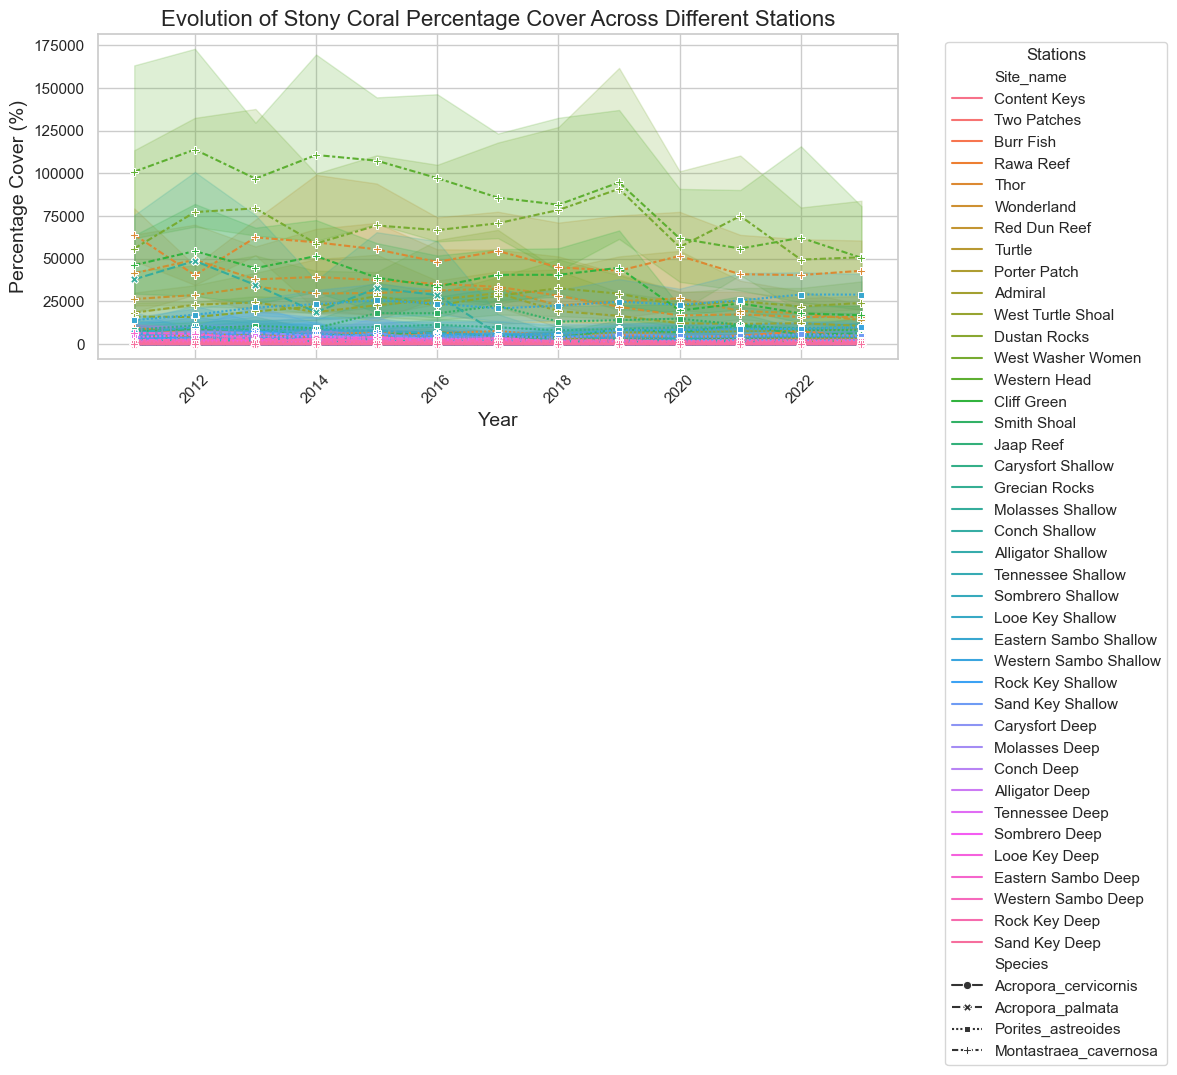

In [5]:
# Analyze the evolution of stony coral percentage cover across different stations during the study period.

# Load the dataset (CREMP_SCOR_Summaries_2023_LTA.csv)
df = pd.read_csv('../data/processed_data/CREMP_SCOR_Summaries_2023_LTA.csv')

# Select relevant columns (Year, Site_name, and species cover columns)
species_columns = ['Year', 'Site_name', 'Acropora_cervicornis', 'Acropora_palmata', 'Porites_astreoides', 'Montastraea_cavernosa']
df_selected = df[species_columns]

# Melt the dataframe to long format for easier plotting
df_melted = pd.melt(df_selected, id_vars=['Year', 'Site_name'], var_name='Species', value_name='Percentage_Cover')

# Set the plot style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Year', y='Percentage_Cover', hue='Site_name', style='Species', markers=True)

# Set plot labels and title
plt.title('Evolution of Stony Coral Percentage Cover Across Different Stations', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage Cover (%)', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Stations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot to the 'eda' folder
plt.savefig('../evaluation_criteria/evolution_stony_coral_percentage_cover.png', dpi=300)
plt.show()


C:\Users\Elite\AppData\Local\Temp\ipykernel_14956\1099186435.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_species['Species_Richness'] = df_species[species_columns].gt(0).sum(axis=1)


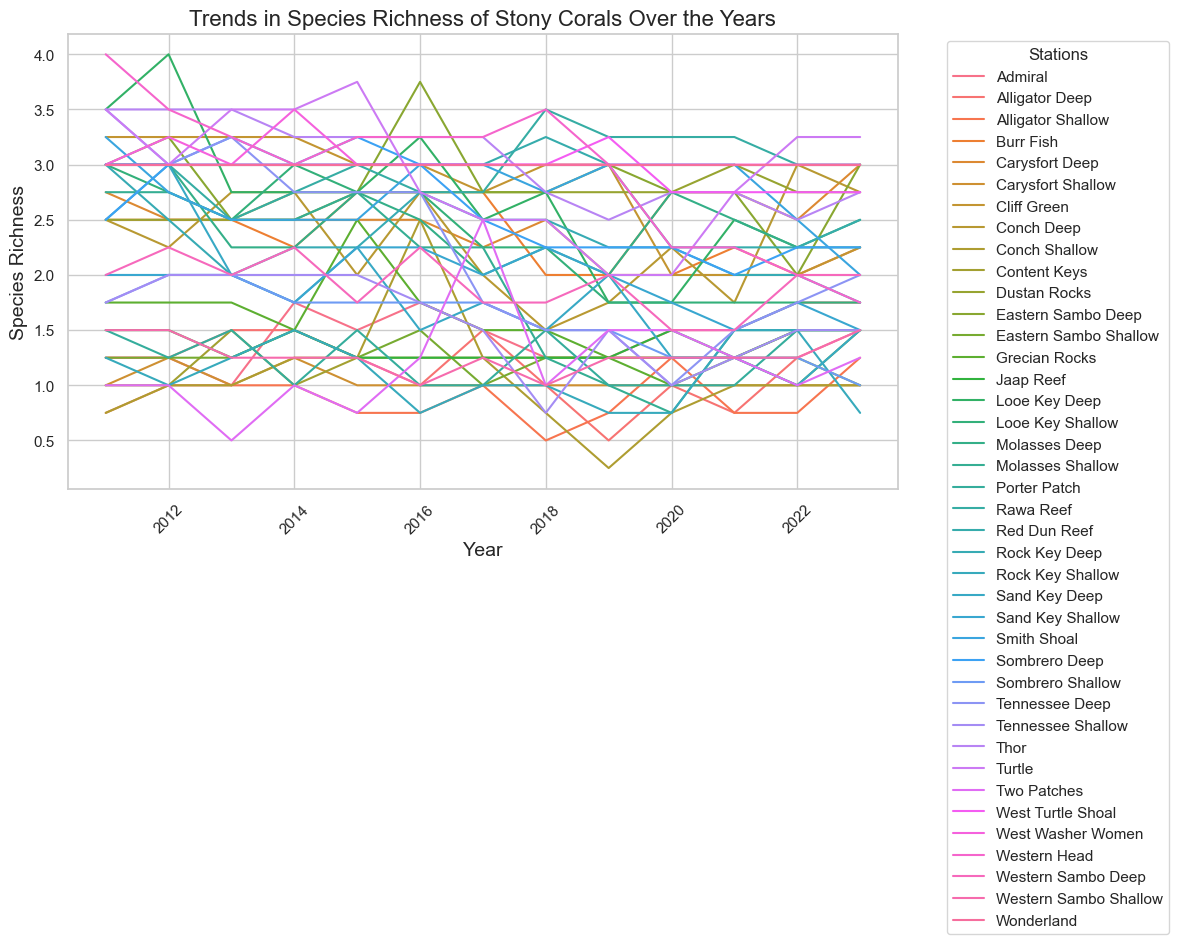

In [6]:
# Identify and interpret trends in species richness of stony corals over the years.

# Load the dataset (CREMP_SCOR_Summaries_2023_LTA.csv)
df = pd.read_csv('../data/processed_data/CREMP_SCOR_Summaries_2023_LTA.csv')

# Select relevant columns (Year, Site_name, and species cover columns)
species_columns = ['Acropora_cervicornis', 'Acropora_palmata', 'Porites_astreoides', 
                   'Montastraea_cavernosa', 'Agaricia_fragilis', 'Agaricia_lamarcki', 
                   'Cladocora_arbuscula', 'Colpophyllia_natans', 'Dendrogyra_cylindrus']

# Create a new dataframe with only the species columns
df_species = df[['Year', 'Site_name'] + species_columns]

# Create a new column for species richness, which is the count of non-zero species for each row
df_species['Species_Richness'] = df_species[species_columns].gt(0).sum(axis=1)

# Aggregate species richness by Year and Site_name to calculate the average species richness per year
df_richness = df_species.groupby(['Year', 'Site_name'])['Species_Richness'].mean().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_richness, x='Year', y='Species_Richness', hue='Site_name', markers=True)

# Set plot labels and title
plt.title('Trends in Species Richness of Stony Corals Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Species Richness', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Stations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot to the 'eda' folder
plt.savefig('../evaluation_criteria/species_richness_trends.png', dpi=300)
plt.show()


C:\Users\Elite\AppData\Local\Temp\ipykernel_14956\4229192341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_density_selected['Total_Octocoral_Density'] = df_density_selected[species_columns].sum(axis=1)


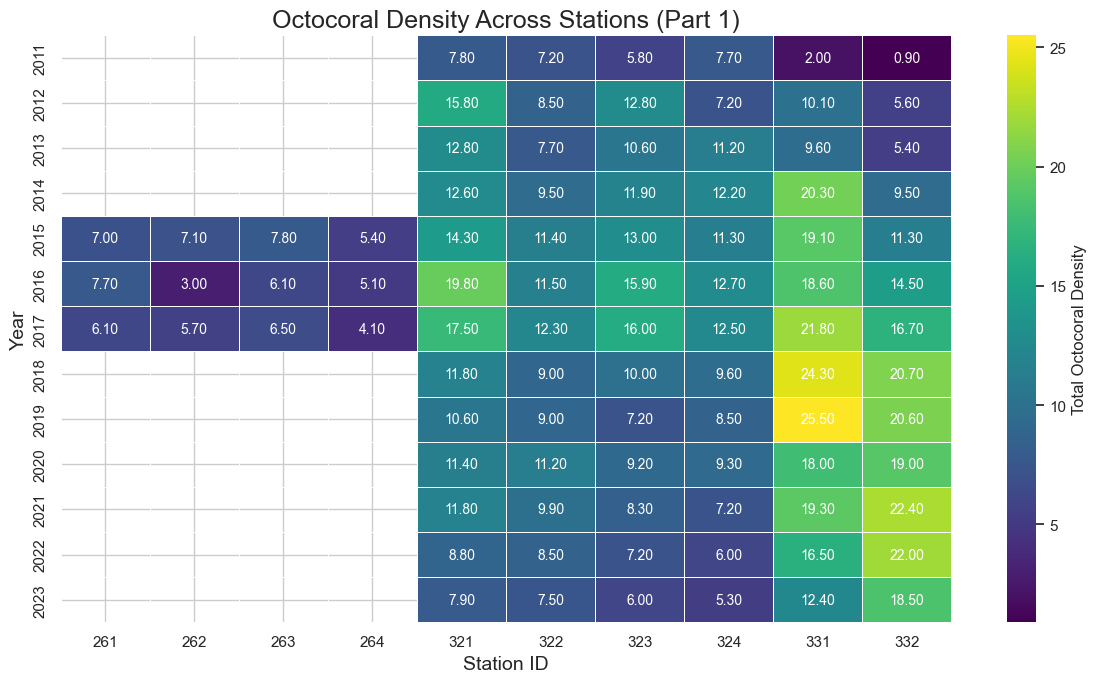

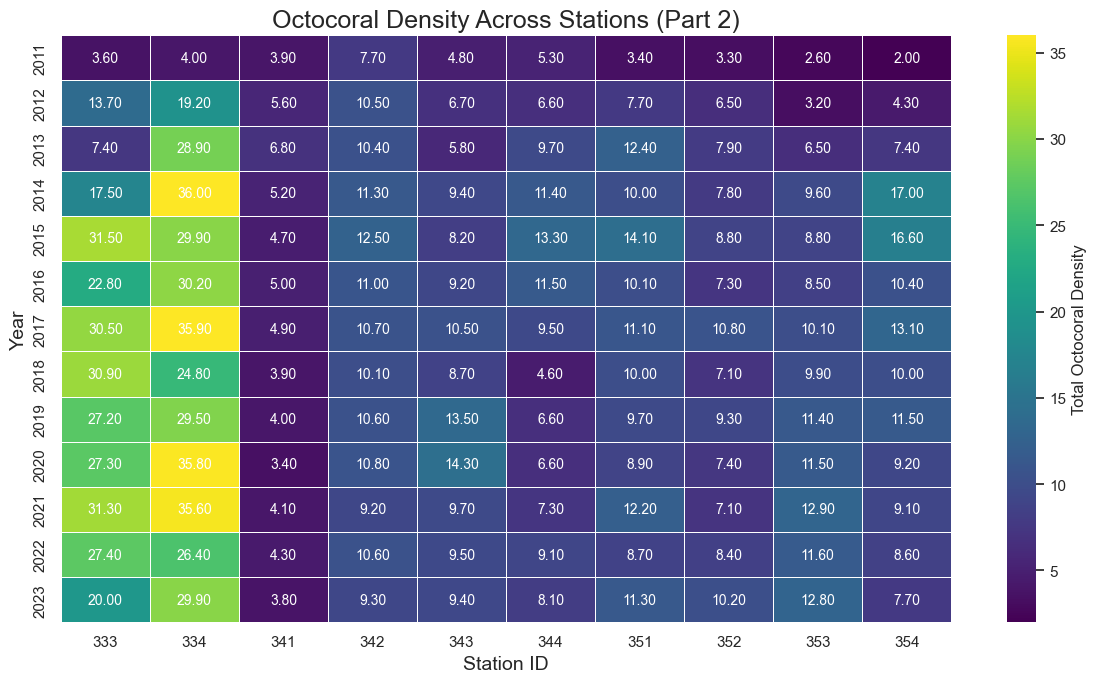

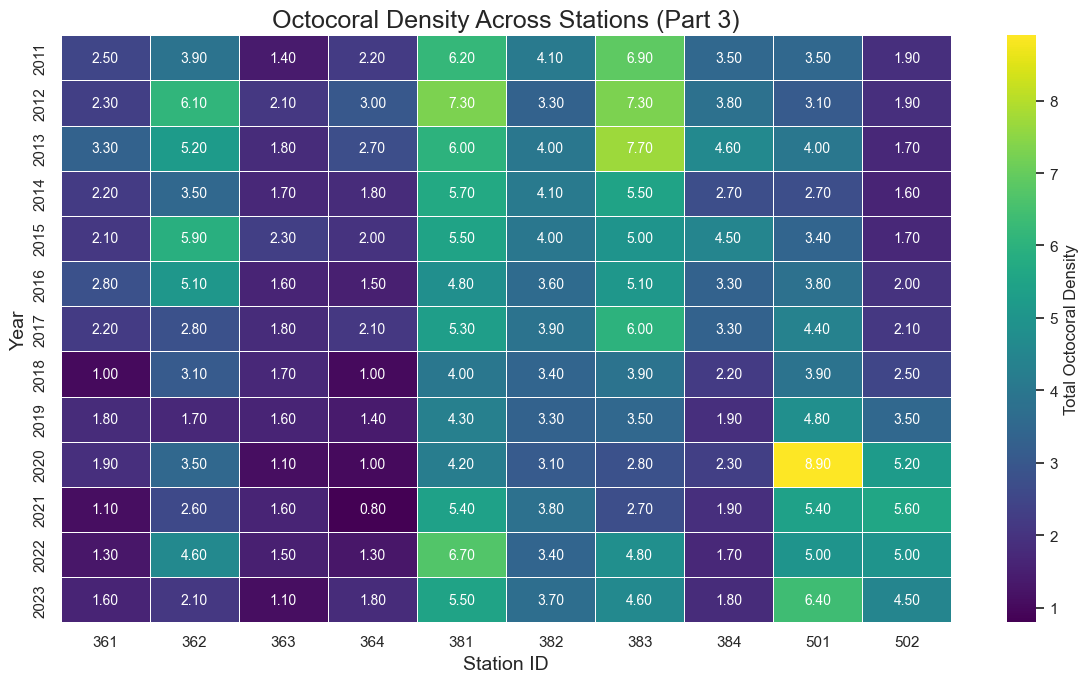

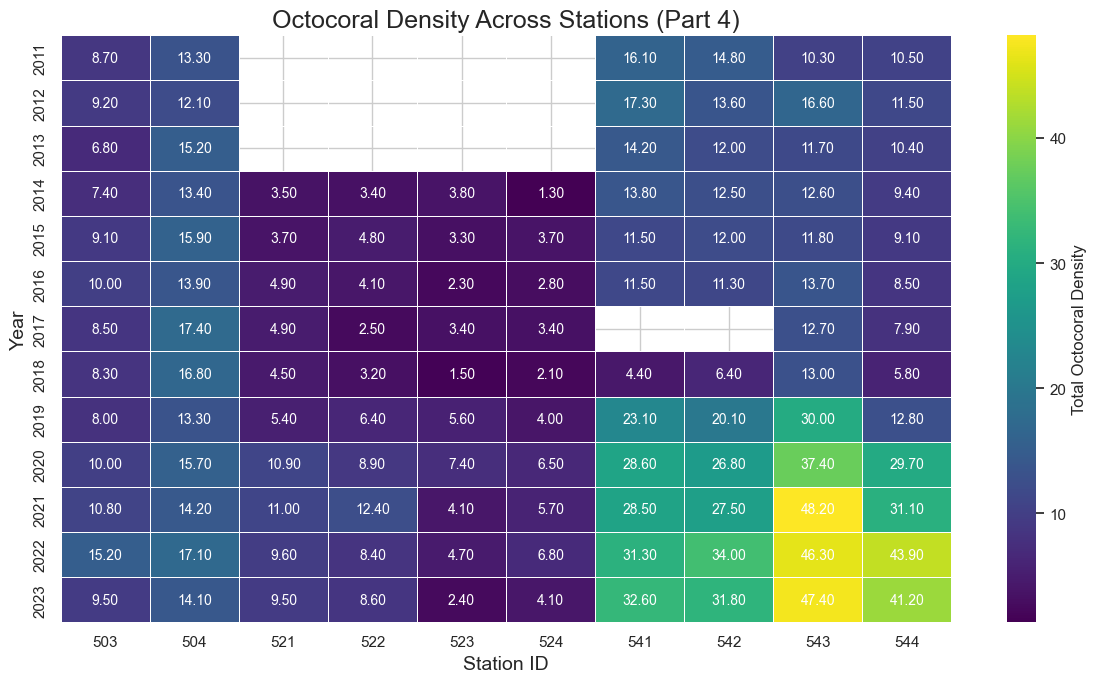

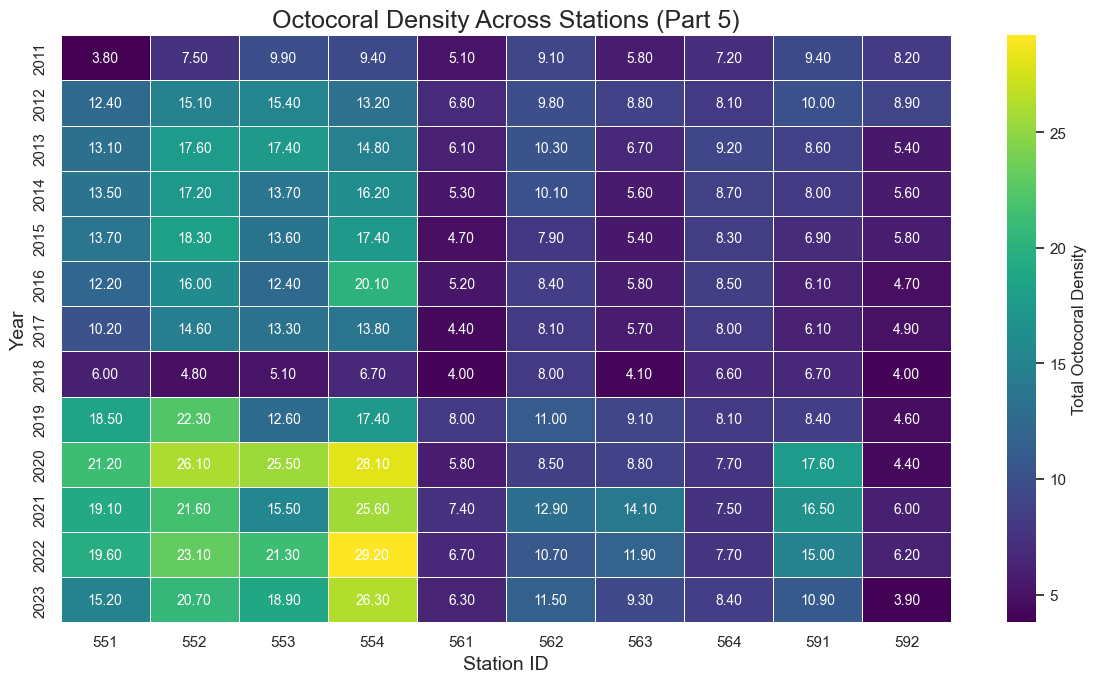

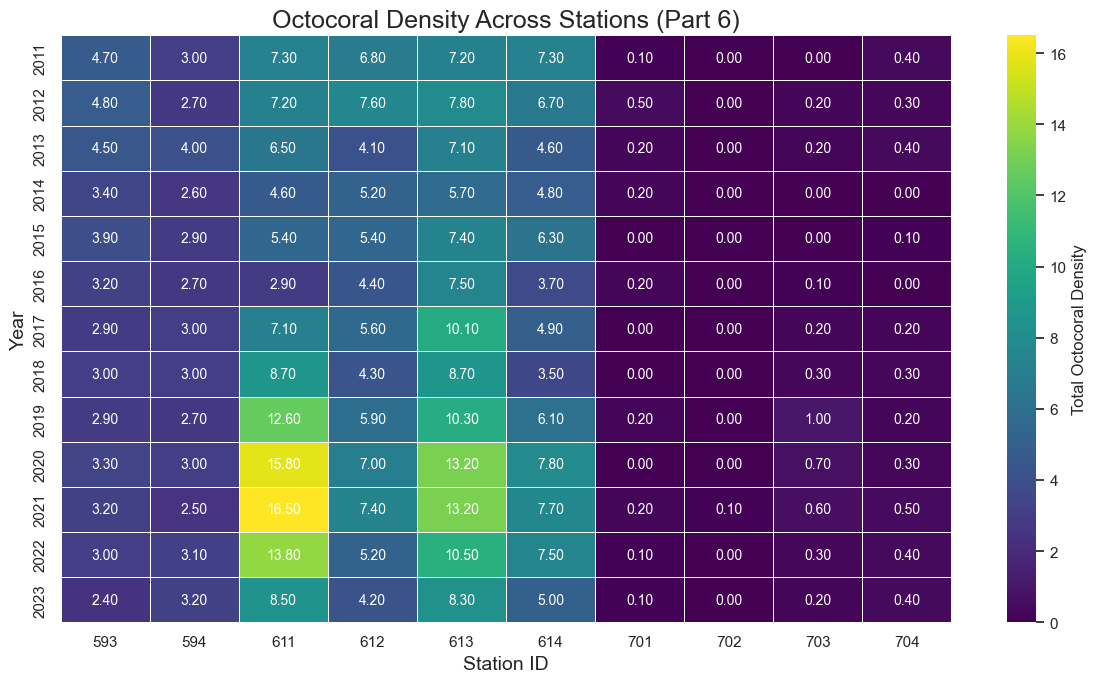

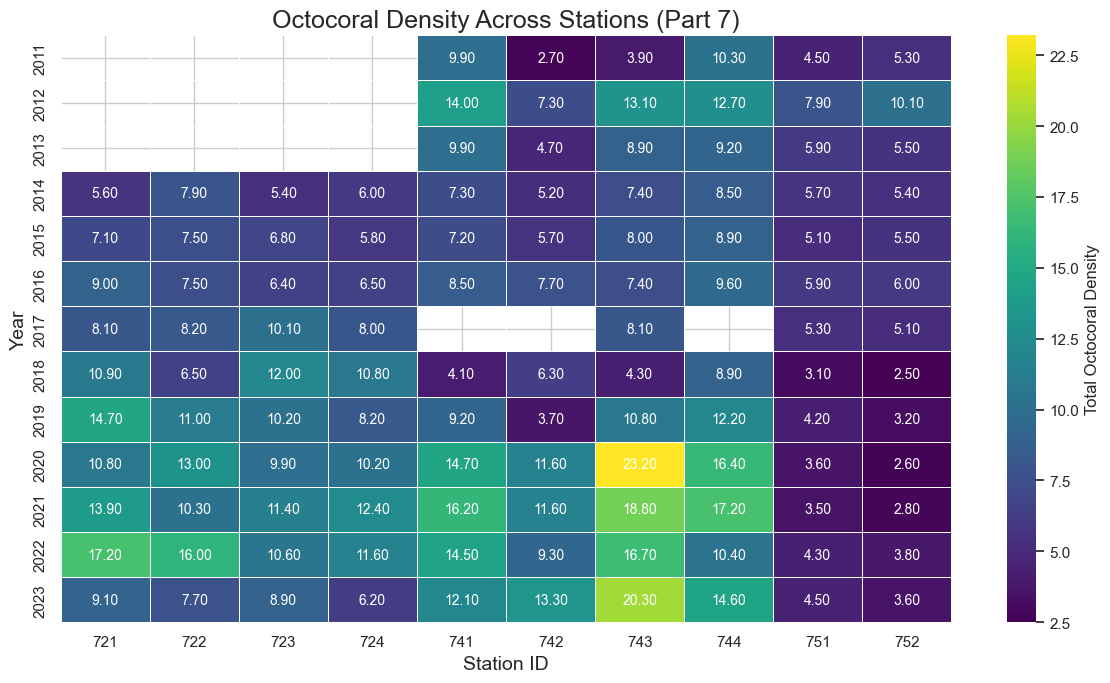

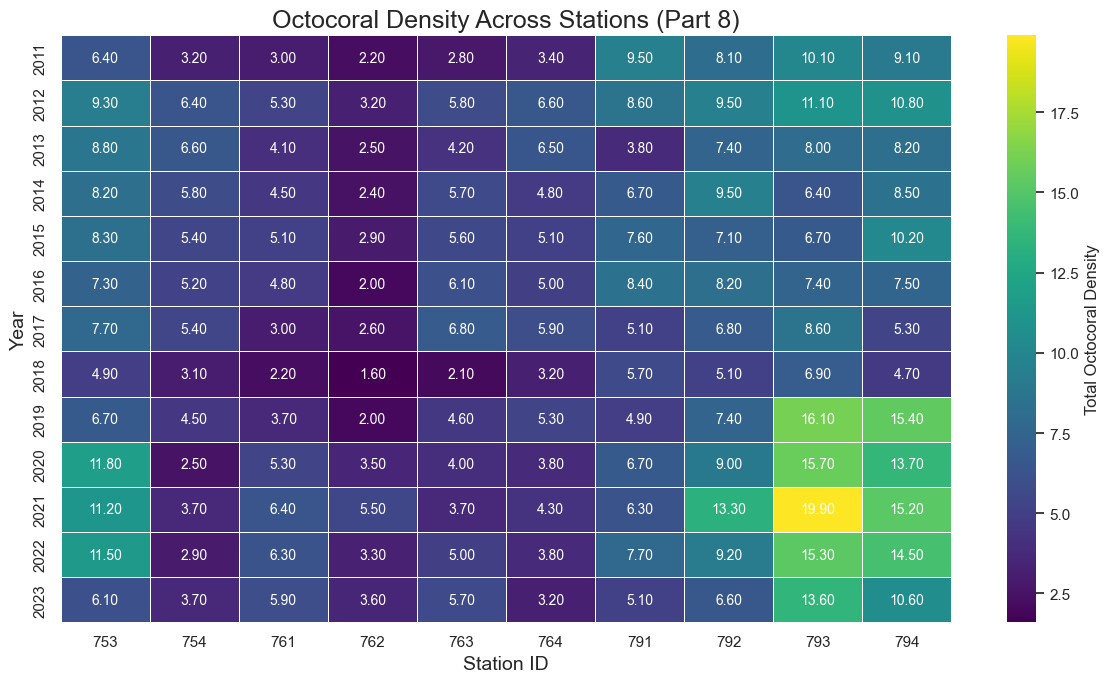

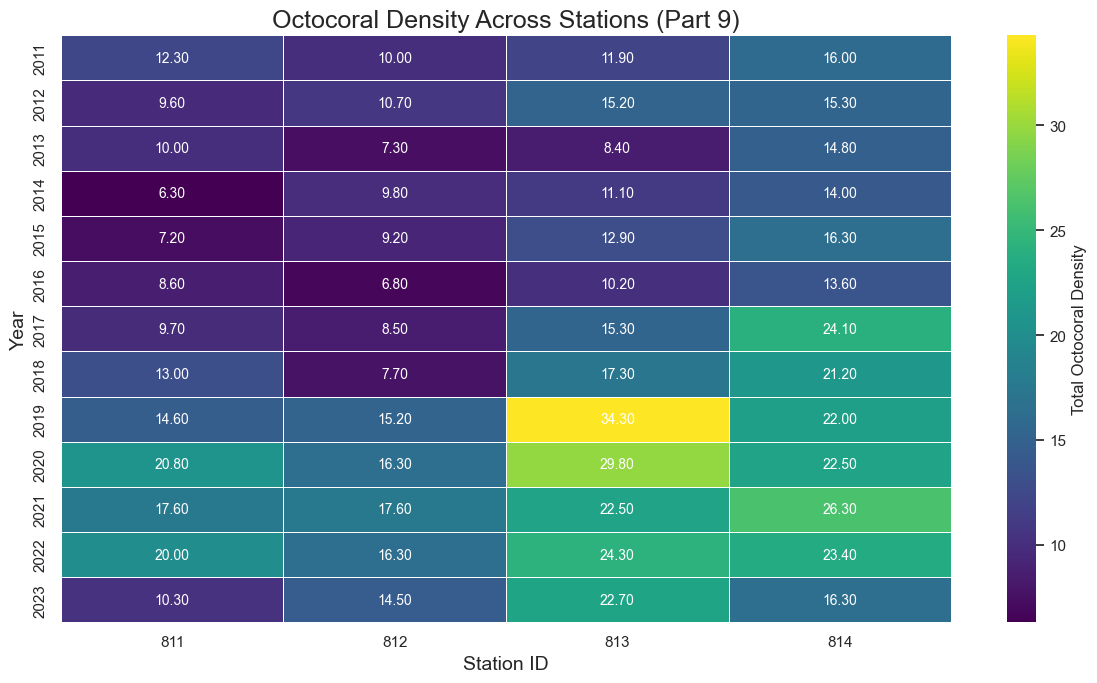

In [ ]:
# Examine how the density of octocoral species varies across stations and over time.

# Load the dataset
df_density = pd.read_csv('../data/processed_data/CREMP_OCTO_Summaries_2023_Density.csv')

# Relevant species columns
species_columns = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana', 'Eunicea_flexuosa']

# Select relevant columns
df_density_selected = df_density[['Year', 'Site_name', 'StationID'] + species_columns]

# Calculate total octocoral density
df_density_selected['Total_Octocoral_Density'] = df_density_selected[species_columns].sum(axis=1)

# Aggregate by Year and StationID
df_density_agg = df_density_selected.groupby(['Year', 'StationID'])['Total_Octocoral_Density'].mean().reset_index()

# Pivot to create heatmap format
df_pivot = df_density_agg.pivot(index='Year', columns='StationID', values='Total_Octocoral_Density')

# Split stations into chunks of 10
stations = sorted(df_pivot.columns)
chunk_size = 10
station_chunks = [stations[i:i+chunk_size] for i in range(0, len(stations), chunk_size)]

# Generate heatmap for each chunk
for i, chunk in enumerate(station_chunks):
    plt.figure(figsize=(12, 7))
    sns.heatmap(
        df_pivot[chunk],
        annot=True,
        cmap="viridis",
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={'label': 'Total Octocoral Density'},
        annot_kws={"size": 10, "color": "white"}
    )
    plt.title(f'Octocoral Density Across Stations (Part {i+1})', fontsize=18)
    plt.xlabel('Station ID', fontsize=14)
    plt.ylabel('Year', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'../evaluation_criteria/octocoral_density_heatmap_part{i+1}.png', dpi=300)
    plt.show()


C:\Users\Elite\AppData\Local\Temp\ipykernel_14956\1095707955.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_species['Total_Coral_Cover'] = df_species[species_columns].sum(axis=1)
C:\Users\Elite\AppData\Local\Temp\ipykernel_14956\1095707955.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_species, x='StationID', y='Total_Coral_Cover', palette='viridis')


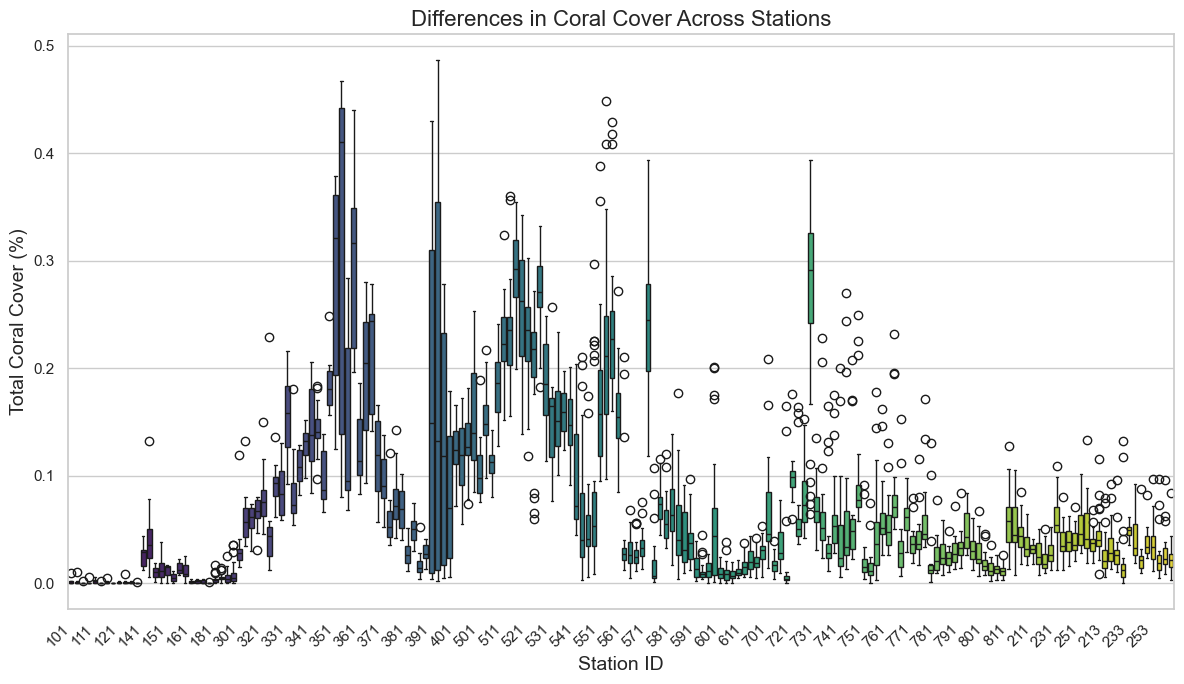

ANOVA result: F-statistic = 60.69, p-value = 0.0000
There are significant differences in the living tissue area (coral cover) between the stations.


In [9]:
# Determine whether there are significant differences in the living tissue area of stony
# corals between monitoring sites.

# Load the dataset
df_pcover = pd.read_csv('../data/processed_data/CREMP_Pcover_2023_StonyCoralSpecies.csv')

# Select relevant columns (species columns)
species_columns = [
    'Acropora_cervicornis', 'Acropora_palmata', 'Agaricia_fragilis', 'Agaricia_lamarcki',
    'Cladocora_arbuscula', 'Colpophyllia_natans', 'Dendrogyra_cylindrus', 'Dichocoenia_stokesii',
    'Diploria_labyrinthiformis', 'Eusmilia_fastigiata', 'Favia_fragum', 'Helioseris_cucullata',
    'Isophyllia_rigida', 'Isophyllia_sinuosa', 'Madracis_aurentenra', 'Madracis_decactis_complex',
    'Manicina_areolata', 'Meandrina_meandrites', 'Millepora_alcicornis', 'Millepora_complanata',
    'Montastraea_cavernosa', 'Mussa_angulosa', 'Mycetophyllia_aliciae', 'Mycetophyllia_ferox',
    'Mycetophyllia_lamarckiana_complex', 'Oculina_diffusa', 'Oculina_robusta', 'Orbicella_annularis_complex',
    'Phyllangia_americana', 'Porites_astreoides', 'Porites_porites_complex', 'Pseudodiploria_clivosa',
    'Pseudodiploria_strigosa', 'Scleractinia', 'Scolymia_sp', 'Siderastrea_radians', 'Siderastrea_siderea',
    'Solenastrea_bournoni', 'Stephanocoenia_intersepta', 'Undaria_agaricites_complex'
]

# Create a new dataframe with just species columns and add Year, SiteID, and StationID for grouping
df_species = df_pcover[['Year', 'SiteID', 'StationID'] + species_columns]

# Calculate total coral cover by summing across species columns
df_species['Total_Coral_Cover'] = df_species[species_columns].sum(axis=1)

# Boxplot to visualize coral cover differences between stations
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_species, x='StationID', y='Total_Coral_Cover', palette='viridis')

# Set plot labels and title
plt.title('Differences in Coral Cover Across Stations', fontsize=16)
plt.xlabel('Station ID', fontsize=14)
plt.ylabel('Total Coral Cover (%)', fontsize=14)

# Rotate x-axis labels for readability and limit the displayed labels
plt.xticks(rotation=45, ha='right')

# Select a subset of station labels to display (e.g., show every 4th station)
ticks_to_display = range(0, len(df_species['StationID'].unique()), 4)  # Every 4th station
plt.xticks(ticks=ticks_to_display, labels=[df_species['StationID'].unique()[i] for i in ticks_to_display])

# Adjust the spacing between x-axis labels
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.tight_layout()

# Save the plot to the 'eda' folder
plt.savefig('../evaluation_criteria/coral_cover_across_stations_reduced_labels.png', dpi=300)
plt.show()

# Perform ANOVA test to check for significant differences in coral cover between stations
anova_result = stats.f_oneway(
    *[df_species[df_species['StationID'] == station]['Total_Coral_Cover'] for station in df_species['StationID'].unique()]
)

# Output the ANOVA result (F-statistic and p-value)
print(f"ANOVA result: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

# Conclusion
if anova_result.pvalue < 0.05:
    print("There are significant differences in the living tissue area (coral cover) between the stations.")
else:
    print("There are no significant differences in the living tissue area (coral cover) between the stations.")


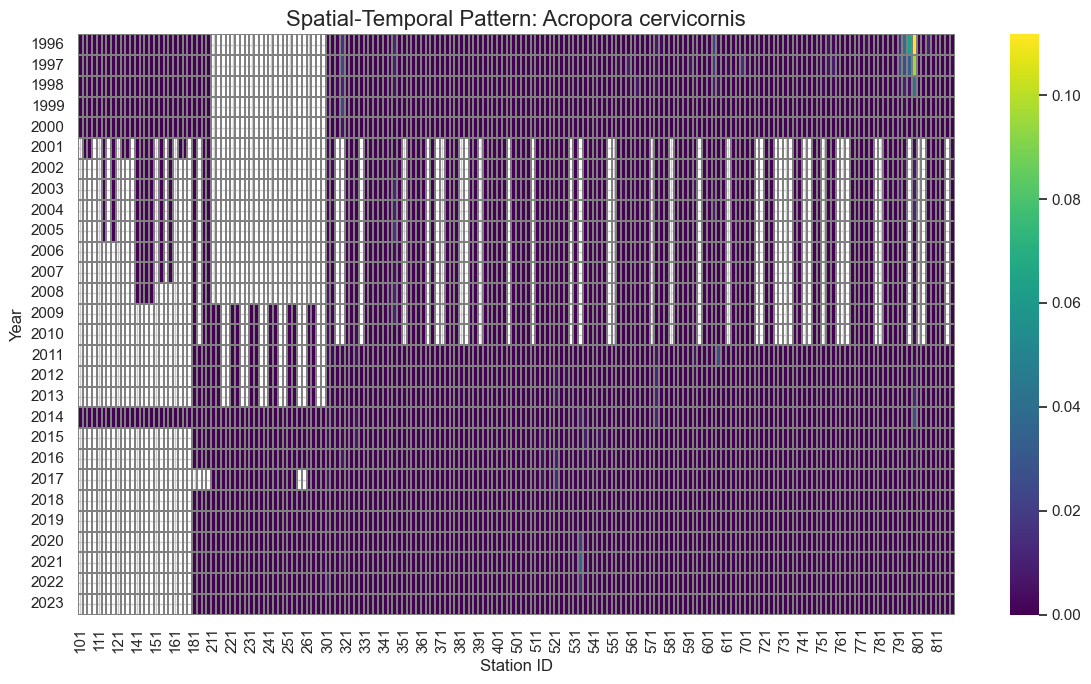

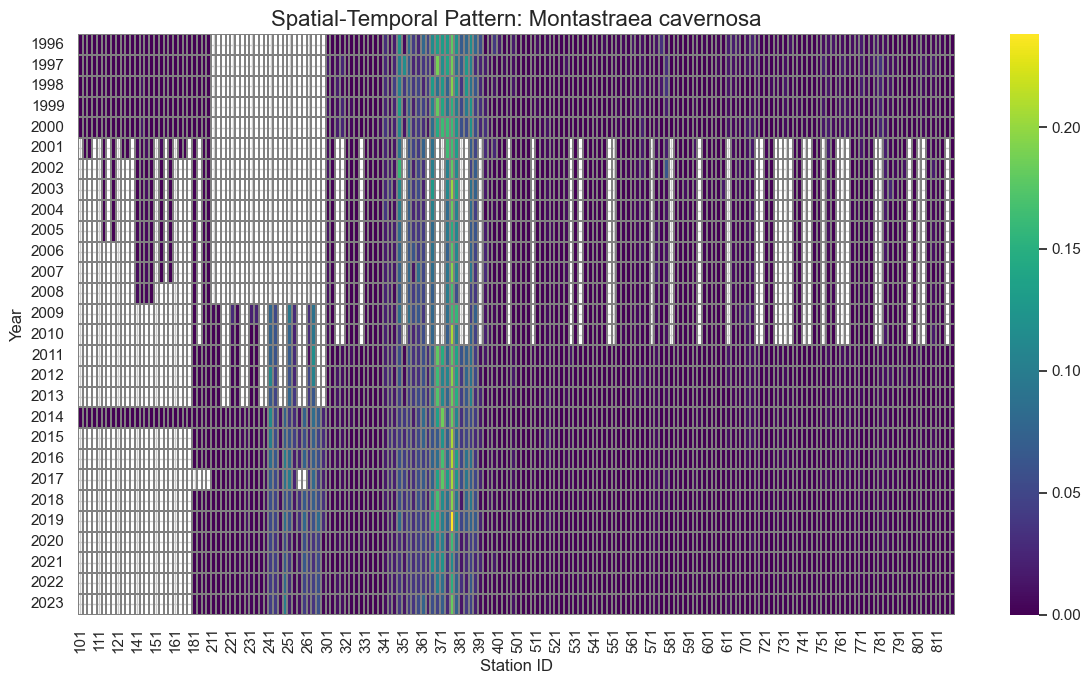

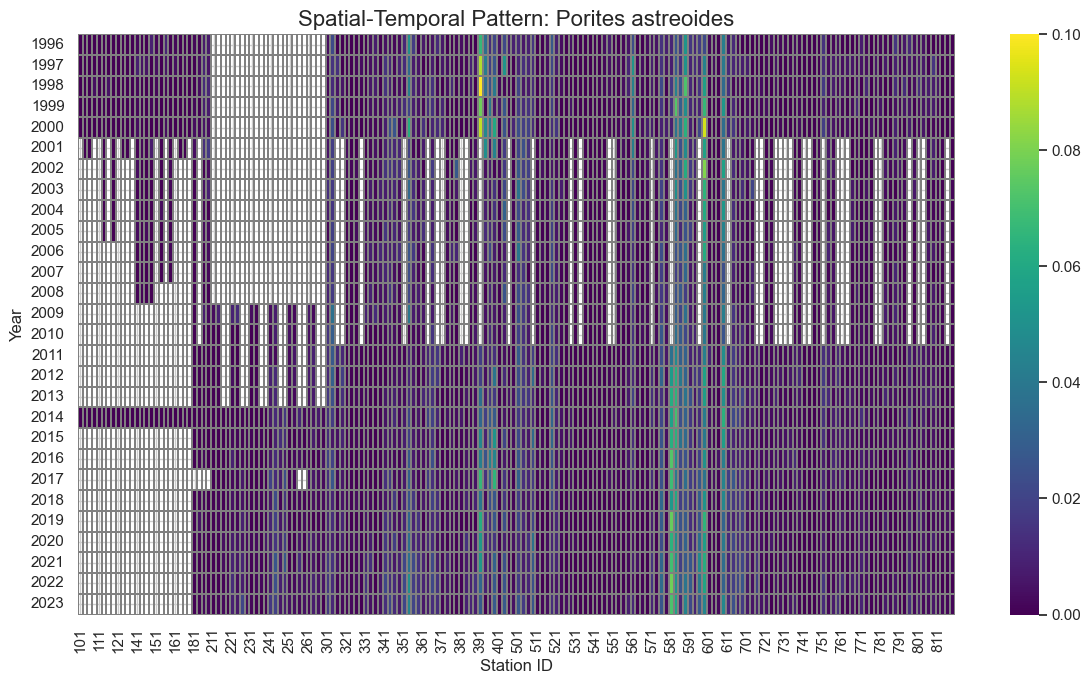

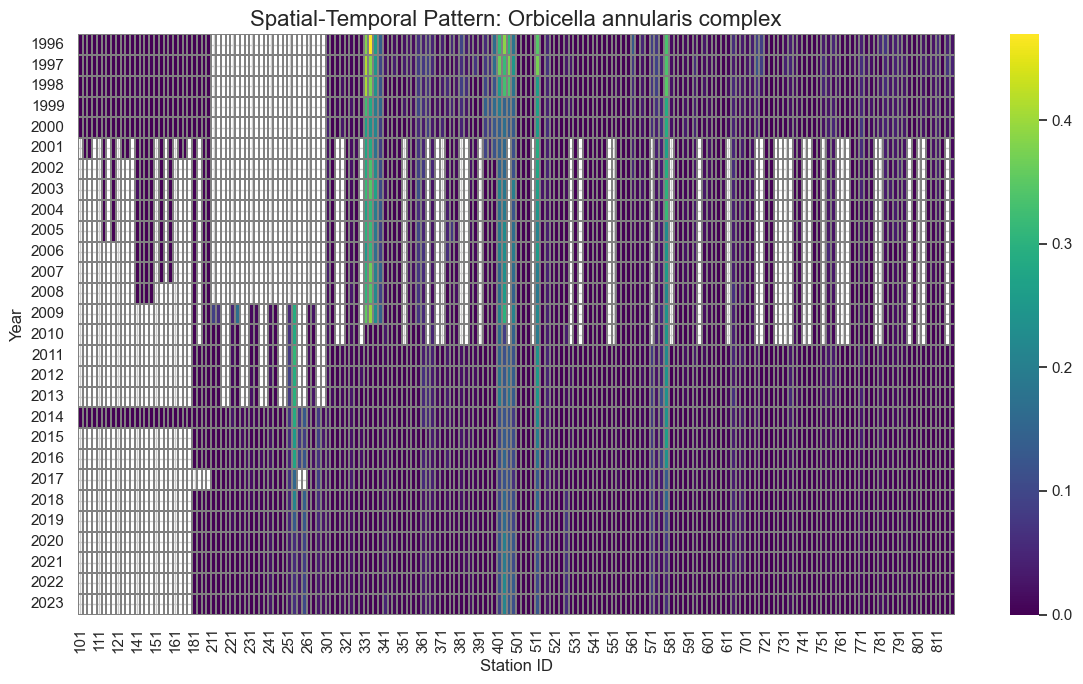

In [10]:
# Assess spatial patterns in the distribution of different coral species and how these patterns change over time.

# Load the stony coral percent cover data
df_pcover = pd.read_csv('../data/processed_data/CREMP_Pcover_2023_StonyCoralSpecies.csv')

# Choose a few representative coral species
species_of_interest = [
    'Acropora_cervicornis', 'Montastraea_cavernosa', 'Porites_astreoides', 'Orbicella_annularis_complex'
]

# Create heatmaps for each species: StationID vs Year with Percent Cover
for species in species_of_interest:
    df_species = df_pcover[['Year', 'StationID', species]].copy()
    df_species = df_species.groupby(['Year', 'StationID'])[species].mean().reset_index()

    # Pivot to format for heatmap
    df_pivot = df_species.pivot(index='Year', columns='StationID', values=species)

    # Plot heatmap
    plt.figure(figsize=(12, 7))
    sns.heatmap(df_pivot, cmap='viridis', linewidths=0.3, linecolor='gray', annot=False)

    plt.title(f'Spatial-Temporal Pattern: {species.replace("_", " ")}', fontsize=16)
    plt.xlabel('Station ID', fontsize=12)
    plt.ylabel('Year', fontsize=12)

    # Save each heatmap
    plt.tight_layout()
    plt.savefig(f'../evaluation_criteria/spatial_temporal_heatmap_{species}.png', dpi=300)
    plt.show()
    plt.close()


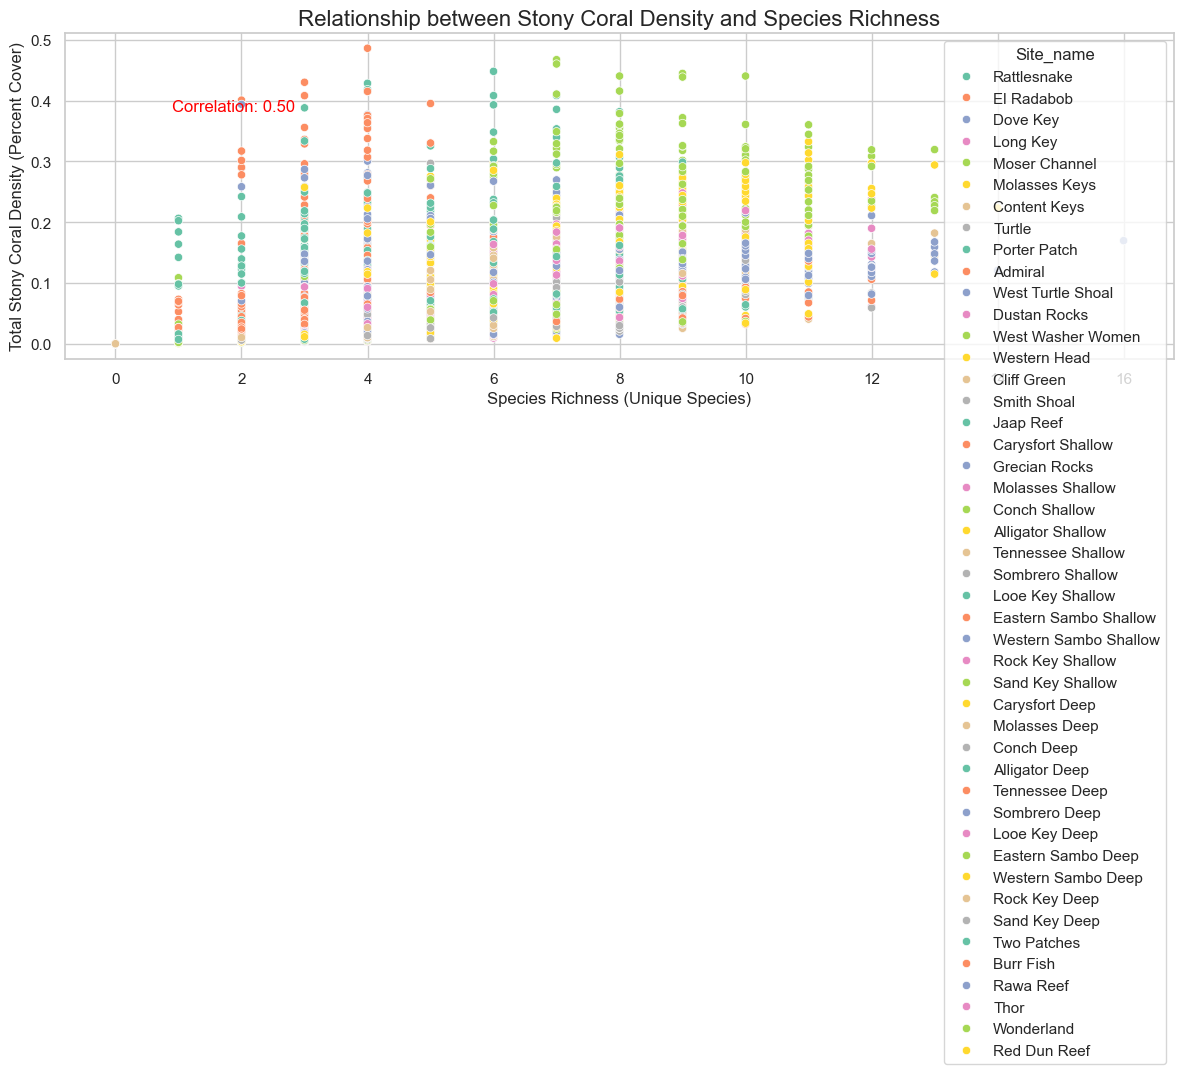

In [12]:
# Assess the relationship between stony coral density and species richness within sites.

# Load the stony coral species cover data
df_pcover = pd.read_csv('../data/processed_data/CREMP_Pcover_2023_StonyCoralSpecies.csv')

# Calculate species richness per site per year
species_columns = df_pcover.columns[10:-1]  # All species columns (adjust based on dataset structure)
df_pcover['species_richness'] = df_pcover[species_columns].apply(lambda x: (x > 0).sum(), axis=1)

# We will assume total percent cover represents the "density" of stony corals
# Summing all species cover for the "density" per site per year
df_pcover['total_density'] = df_pcover[species_columns].sum(axis=1)

# Scatter plot: Species richness vs Total density
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pcover, x='species_richness', y='total_density', hue='Site_name', palette='Set2')

plt.title('Relationship between Stony Coral Density and Species Richness', fontsize=16)
plt.xlabel('Species Richness (Unique Species)', fontsize=12)
plt.ylabel('Total Stony Coral Density (Percent Cover)', fontsize=12)

# Calculate the correlation
correlation = df_pcover[['species_richness', 'total_density']].corr().iloc[0, 1]
plt.figtext(0.15, 0.85, f'Correlation: {correlation:.2f}', fontsize=12, color='red')

# Save the plot
plt.tight_layout()
plt.savefig('../evaluation_criteria/species_richness_vs_density.png', dpi=300)
plt.show()


C:\Users\Elite\AppData\Local\Temp\ipykernel_14956\1440587551.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_density_selected['Total_Octocoral_Density'] = df_density_selected[species_columns].sum(axis=1)


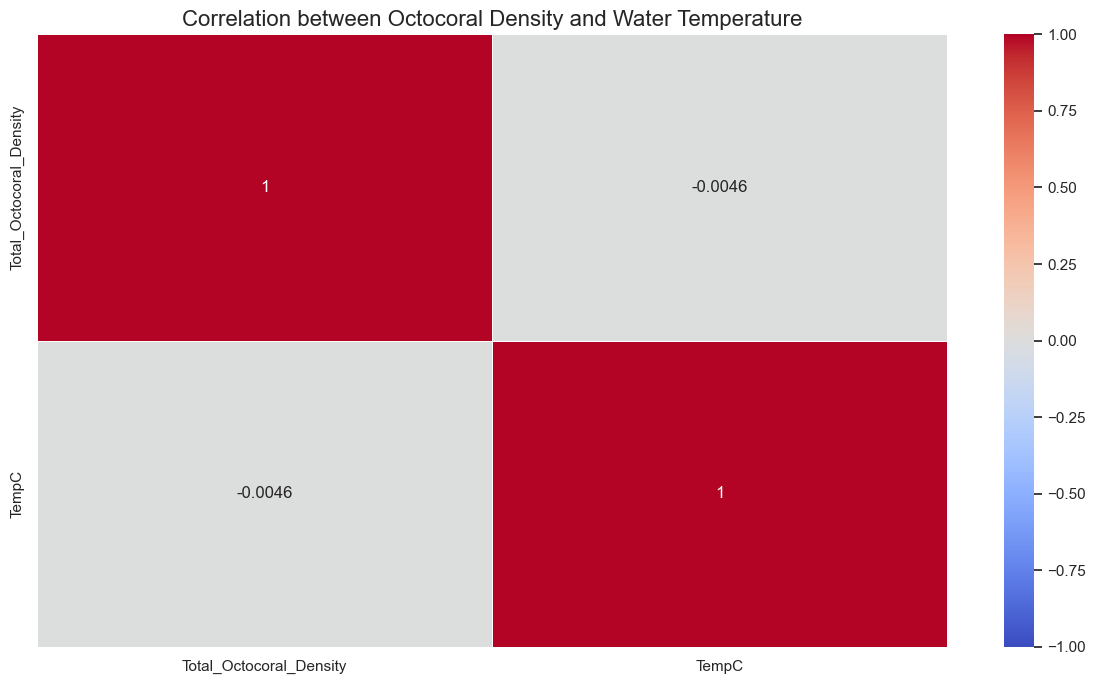

In [14]:
# Evaluate correlations between octocoral density, water temperature, and water temperature.

# Load the datasets
df_density = pd.read_csv('../data/processed_data/CREMP_OCTO_Summaries_2023_Density.csv')
df_temperatures = pd.read_csv('../data/processed_data/CREMP_Temperatures_2023.csv')

# Select relevant columns for octocoral density (year, site, and species)
species_columns = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana', 'Eunicea_flexuosa']
df_density_selected = df_density[['Year', 'SiteID', 'StationID'] + species_columns]

# Calculate the total octocoral density
df_density_selected['Total_Octocoral_Density'] = df_density_selected[species_columns].sum(axis=1)

# Select relevant columns for temperature (year, site, and temperature)
df_temperatures_selected = df_temperatures[['Year', 'SiteID', 'TempC']]

# Merge both datasets on Year and SiteID (since StationID is not in the temperature dataset)
df_merged = pd.merge(df_density_selected, df_temperatures_selected, on=['Year', 'SiteID'], how='inner')

# Check for any missing data
df_merged = df_merged.dropna()

# Calculate the correlation between octocoral density and water temperature
correlation_matrix = df_merged[['Total_Octocoral_Density', 'TempC']].corr()

# Plotting the correlation
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Set title and labels
plt.title('Correlation between Octocoral Density and Water Temperature', fontsize=16)
plt.tight_layout()

# Save the plot
plt.savefig('../evaluation_criteria/octocoral_density_temp_correlation_heatmap.png', dpi=300)
plt.show()




C:\Users\Elite\AppData\Local\Temp\ipykernel_14956\794345697.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_density_selected['Total_Octocoral_Density'] = df_density_selected[species_columns].sum(axis=1)


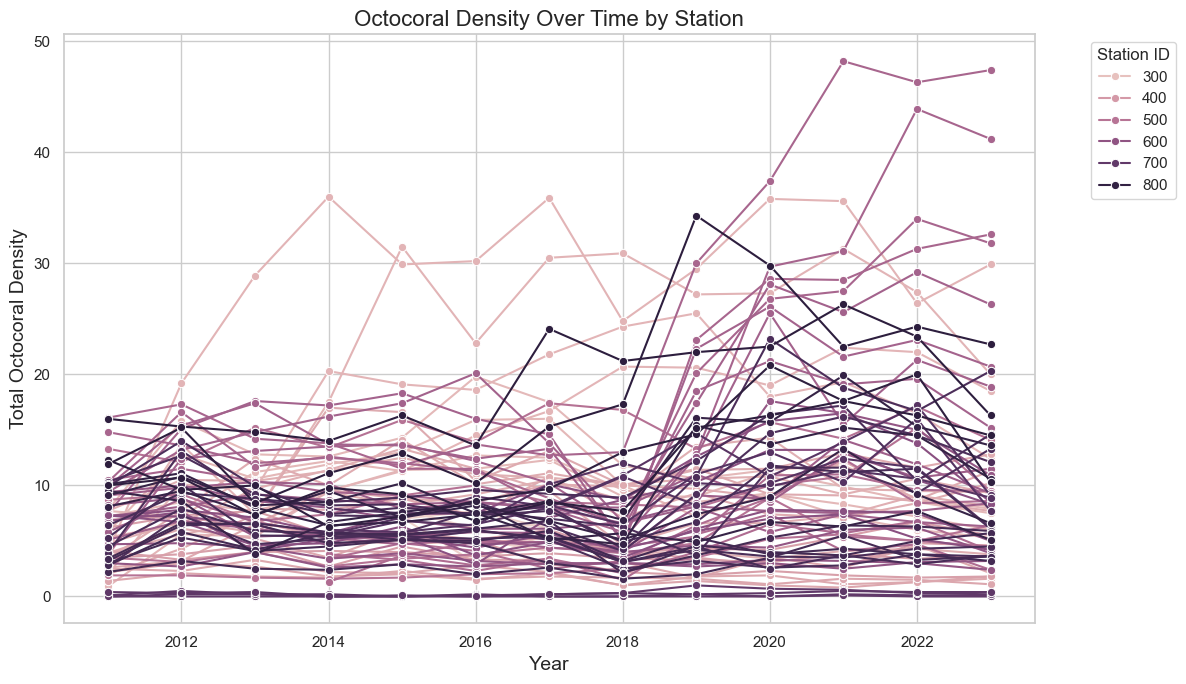

In [15]:
# Observe and analyze differences between stations in coral reef parameters—density,
# species composition, and percent cover—and how these parameters evolve over time.

# Load the dataset for octocoral density
df_density = pd.read_csv('../data/processed_data/CREMP_OCTO_Summaries_2023_Density.csv')

# Select relevant columns for octocoral density (Year, StationID, and species)
species_columns = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana', 'Eunicea_flexuosa']
df_density_selected = df_density[['Year', 'StationID'] + species_columns]

# Calculate total octocoral density
df_density_selected['Total_Octocoral_Density'] = df_density_selected[species_columns].sum(axis=1)

# Plot total octocoral density over time for each station
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_density_selected, x='Year', y='Total_Octocoral_Density', hue='StationID', marker='o')
plt.title('Octocoral Density Over Time by Station', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Octocoral Density', fontsize=14)
plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('../evaluation_criteria/octocoral_density_time_station.png', dpi=300)
plt.show()


C:\Users\Elite\AppData\Local\Temp\ipykernel_14956\681572911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_density_selected['Species_Richness'] = df_density_selected[species_columns].gt(0).sum(axis=1)


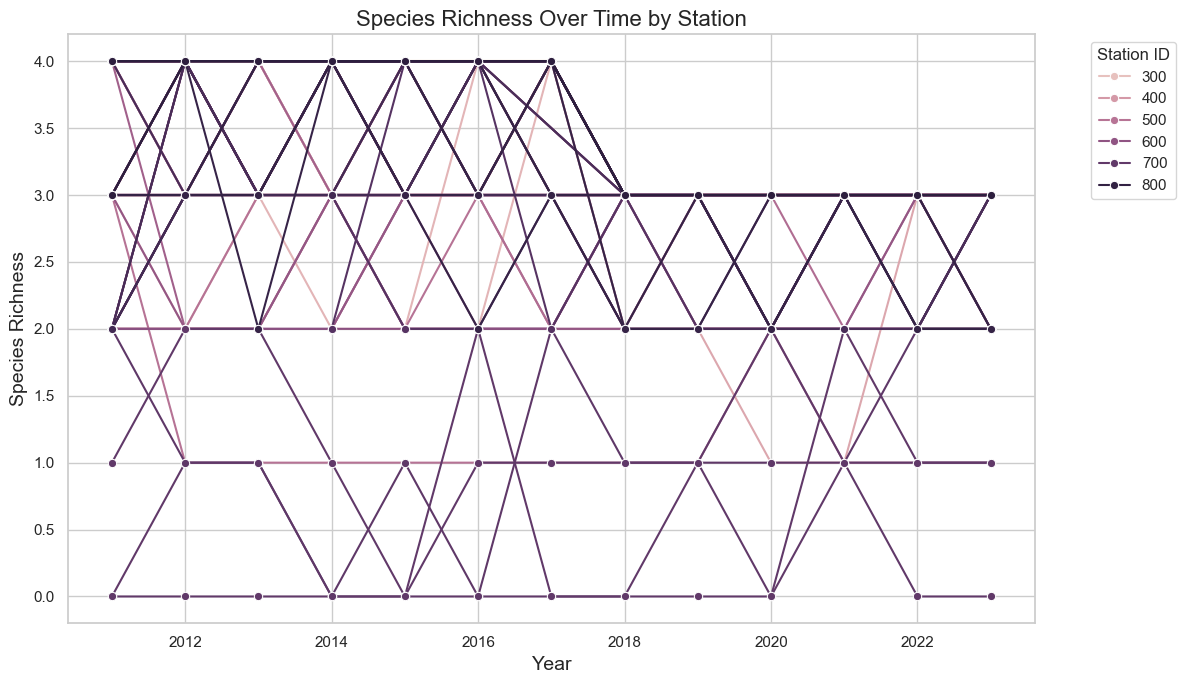

In [ ]:
# Observe and analyze differences between stations in coral reef parameters—density,
# species composition, and percent cover—and how these parameters evolve over time.

# We will use species richness (number of species present) to compare the composition.
df_density_selected['Species_Richness'] = df_density_selected[species_columns].gt(0).sum(axis=1)

# Plot species richness over time for each station
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_density_selected, x='Year', y='Species_Richness', hue='StationID', marker='o')
plt.title('Species Richness Over Time by Station', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Species Richness', fontsize=14)
plt.legend(title='Station ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('../evaluation_criteria/species_richness_time_station.png', dpi=300)
plt.show()


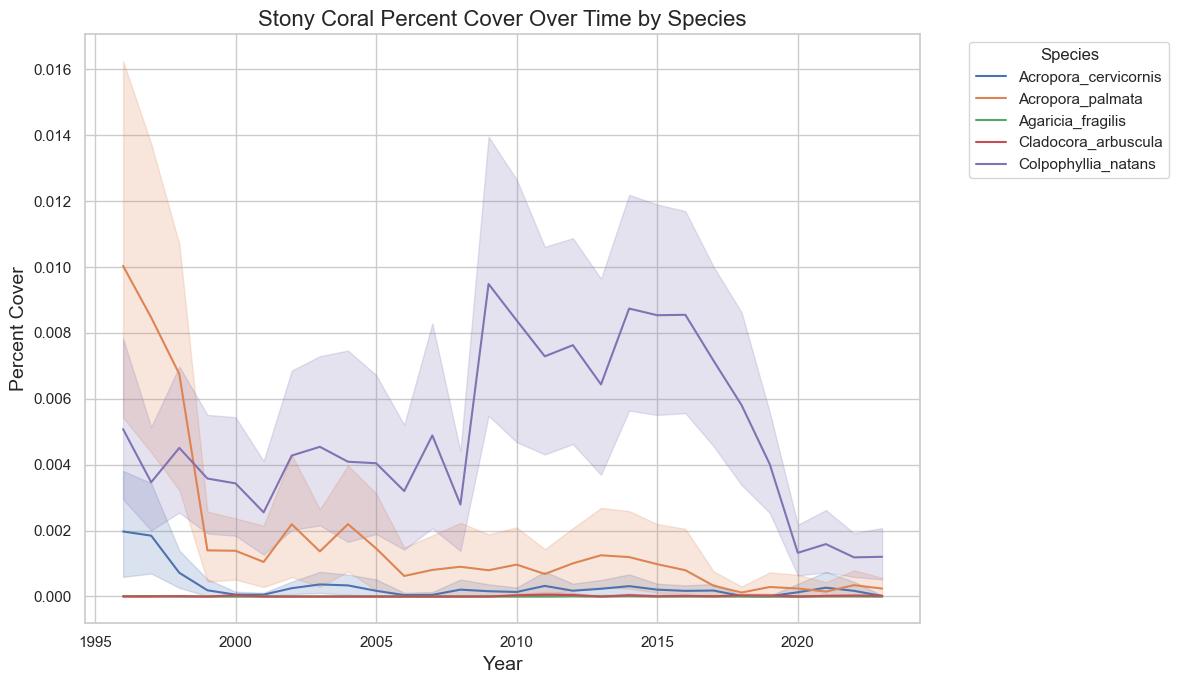

In [17]:
# Observe and analyze differences between stations in coral reef parameters—density,
# species composition, and percent cover—and how these parameters evolve over time.

# Load the dataset for stony coral species cover
df_pcover = pd.read_csv('../data/processed_data/CREMP_Pcover_2023_StonyCoralSpecies.csv')

# Select relevant columns for percent cover (Year, SiteID, and stony coral species)
# Assuming columns have species names such as 'Acropora_cervicornis', etc.
species_columns_stony = ['Acropora_cervicornis', 'Acropora_palmata', 'Agaricia_fragilis', 'Cladocora_arbuscula', 'Colpophyllia_natans']

df_pcover_selected = df_pcover[['Year', 'SiteID'] + species_columns_stony]

# Plot percent cover for stony coral species over time for each station
plt.figure(figsize=(12, 7))
for species in species_columns_stony:
    sns.lineplot(data=df_pcover_selected, x='Year', y=species, label=species)

plt.title('Stony Coral Percent Cover Over Time by Species', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percent Cover', fontsize=14)
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot
plt.savefig('../evaluation_criteria/stony_coral_percent_cover_time_species.png', dpi=300)
plt.show()
